In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/crystalosuna/Documents/Gun Violence Analysis'

In [4]:
#Import gun violence data

df= pd.read_csv (os.path.join(path, 'Data', 'gun-violence-data-clean2.csv'), index_col = False)

In [5]:
df.shape

(239677, 25)

In [6]:
df.columns

Index(['0', 'incident_id', 'date', 'state', 'city_or_county', 'Killed',
       'Injured', 'congressional_district', 'gun_type',
       'incident_characteristics', 'Gang Related', 'Mass shooting?',
       'number_guns_involved', 'participant_age', 'participant_age_group',
       'participant_gender', 'participant_status', 'participant_type',
       'state_house_district', 'state_senate_district', 'latitude',
       'longitude', 'year', 'month', 'loss'],
      dtype='object')

/var/folders/xd/drqthjd9059gd5kl114ffjhr0000gn/T/ipykernel_41059/3073501522.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loss'], bins=25) # Shows extreme values


<Axes: xlabel='loss', ylabel='Density'>

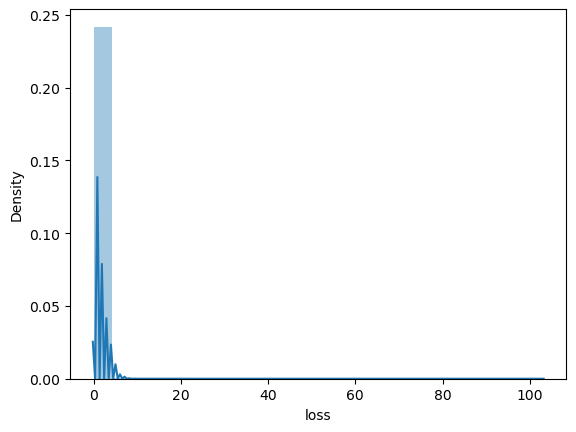

In [7]:
sns.distplot(df['loss'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [8]:
df['loss'].mean()

0.7462960567764116

In [9]:
df['loss'].median()

1.0

In [10]:
df['loss'].max()

103

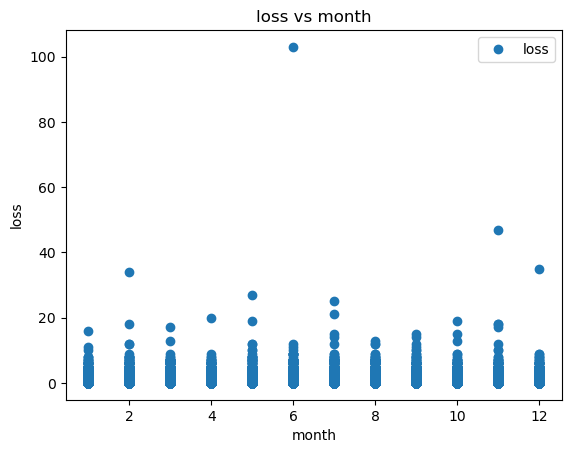

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'month', y='loss',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('loss vs month')  
plt.xlabel('month')  
plt.ylabel('loss')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['month'].values.reshape(-1,1)
y = df['loss'].values.reshape(-1,1)

In [20]:
X

array([[1],
       [1],
       [1],
       ...,
       [3],
       [3],
       [3]])

In [21]:
y

array([[4],
       [4],
       [4],
       ...,
       [1],
       [1],
       [2]])

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

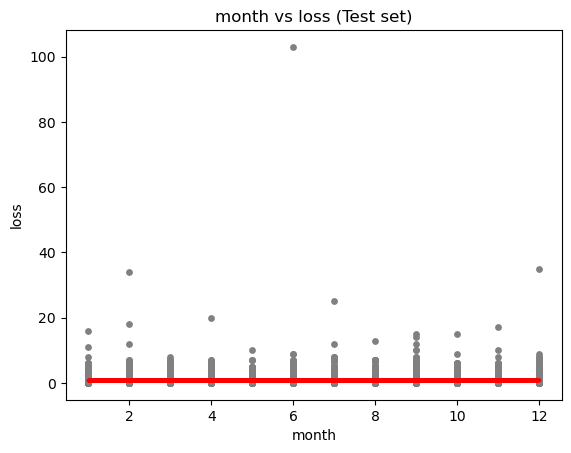

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('month vs loss (Test set)')
plot_test.xlabel('month')
plot_test.ylabel('loss')
plot_test.show()

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00469651]]
Mean squared error:  0.8355798204991159
R2 score:  6.048848699558018e-05


In [29]:
y_predicted

array([[0.74400471],
       [0.74870122],
       [0.74400471],
       ...,
       [0.75339773],
       [0.72991519],
       [0.74400471]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,0.744005
1,5,0.748701
2,1,0.744005
3,1,0.720522
4,0,0.739308
5,0,0.753398
6,1,0.758094
7,1,0.753398
8,0,0.720522
9,1,0.767487


Compare how the regression fits the training set

In [31]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00469651]]
Mean squared error:  0.6552345488120855
R2 score:  0.0003996035942276377


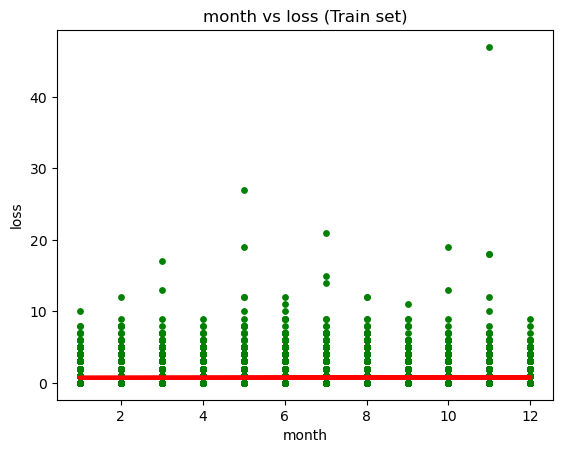

In [34]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('month vs loss (Train set)')
plot_test.xlabel('month')
plot_test.ylabel('loss')
plot_test.show()

BONUS: Performance improvement after removing outliers

In [35]:
# Clean the extreme values from the "loss" variable observed during the consistency checks.

df_test = df[df['loss'] <=50] 

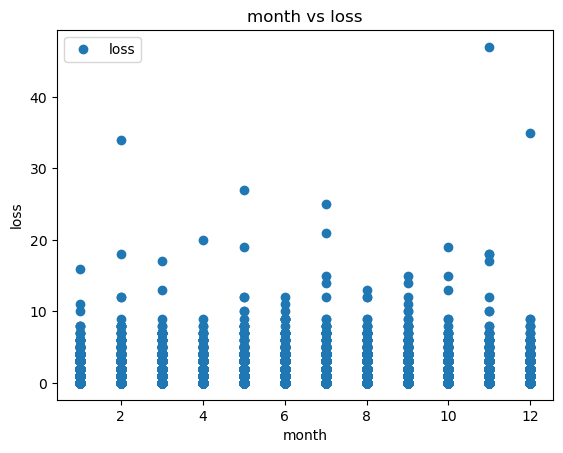

In [36]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'month', y='loss', style='o')  
plt.title('month vs loss')  
plt.xlabel('month')  
plt.ylabel('loss')  
plt.show()

In [37]:
# Reshape again.

X_2 = df_test['month'].values.reshape(-1,1)
y_2 = df_test['loss'].values.reshape(-1,1)

In [38]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [39]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [40]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [41]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0042651]]
Mean squared error:  0.7020587141782185
R2 score:  0.00023860704268152677


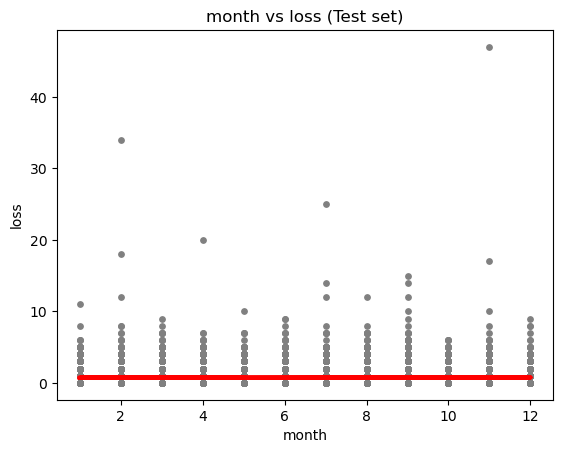

In [43]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('month vs loss (Test set)')
plot_test.xlabel('month')
plot_test.ylabel('loss')
plot_test.show()

In [44]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,3,0.739187
1,0,0.722126
2,1,0.734922
3,0,0.722126
4,0,0.739187
5,0,0.760512
6,0,0.756247
7,0,0.734922
8,2,0.722126
9,0,0.739187
